Importamos librerías

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


Cargamos los Datasets para hacer el respectivo Estudio

In [12]:
df_internet_penetracion = pd.read_csv(r"./Dataset/Penetracion.csv")
df_internet_tecnologia_localidad = pd.read_csv(r"./Dataset/tecnologia_localidad.csv")
df_internet_velocidad_bajada = pd.read_csv(r"./Dataset/velocidad.csv")
df_historico_velocidad_internet = pd.read_csv(r"./Dataset/velocidad_historica.csv")

Ahora avanzamos con la exploración de los datos del primer dataframe "df_internet_penetracion"

In [13]:
# Obtenemos informacion de las columnas y el tipo de dato
df_internet_penetracion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           840 non-null    int64 
 1   Trimestre                     840 non-null    int64 
 2   Provincia                     840 non-null    object
 3   Accesos por cada 100 hogares  840 non-null    object
dtypes: int64(2), object(2)
memory usage: 26.4+ KB


In [14]:
# Obtenemos estadísticas básicas del DataFrame
df_internet_penetracion.describe()

,Año,Trimestre
count,840.000000,840.000000
mean,2017.885714,2.457143
std,2.528745,1.105009
min,2014.000000,1.000000
25%,2016.000000,1.000000
50%,2018.000000,2.000000
75%,2020.000000,3.000000
max,2022.000000,4.000000


In [15]:
# Contamos el número de valores únicos en cada columna
df_internet_penetracion.nunique()

Año                               9
Trimestre                         4
Provincia                        24
Accesos por cada 100 hogares    779
dtype: int64

In [16]:
# Obtenemos un listado de provincias únicas en el DataFrame
df_internet_penetracion['Provincia'].unique()

array(['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut',
       'Córdoba', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy',
       'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén',
       'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán'],
      dtype=object)

In [17]:
# Obtenemos un listadp de años únicos en el DataFrame
df_internet_penetracion['Año'].unique()

array([2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014], dtype=int64)

In [18]:
# Obtenemos un listado de trimestres únicos en el DataFrame
df_internet_penetracion['Trimestre'].unique()

array([3, 2, 1, 4], dtype=int64)

## Empezamos la creación de graficos para identificar patrones y valores atípicos

In [19]:
# Convertir la columna 'Accesos por cada 100 hogares' a tipo numérico
df_internet_penetracion['Accesos por cada 100 hogares'] = pd.to_numeric(df_internet_penetracion['Accesos por cada 100 hogares'].str.replace(',', '.'))

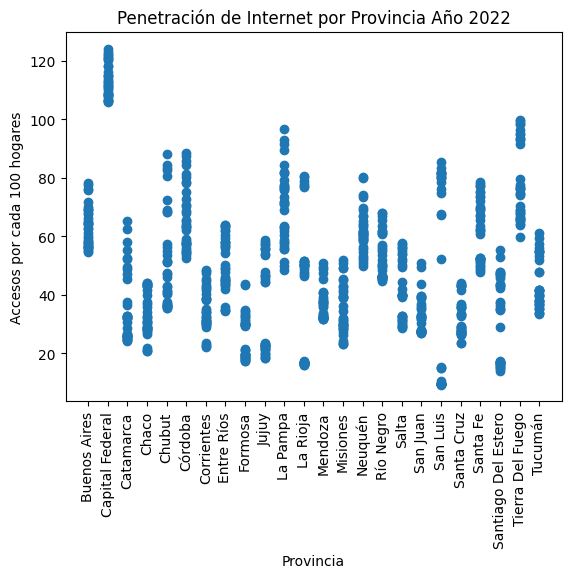

In [20]:
# Crear el gráfico de dispersión
plt.scatter(df_internet_penetracion['Provincia'], df_internet_penetracion['Accesos por cada 100 hogares'])
plt.xlabel('Provincia')
plt.ylabel('Accesos por cada 100 hogares')
plt.title('Penetración de Internet por Provincia Año 2022')
plt.xticks(rotation=90)
plt.show()

Podemos observar que la penetración de Internet es más alta en las provincias más desarrolladas, como la Ciudad de Buenos Aires y la Provincia de Buenos Aires. La penetración de Internet es más baja en las provincias más rurales, como Formosa y Santiago del Estero. Hay una gran brecha digital entre las provincias más desarrolladas y las más rurales.

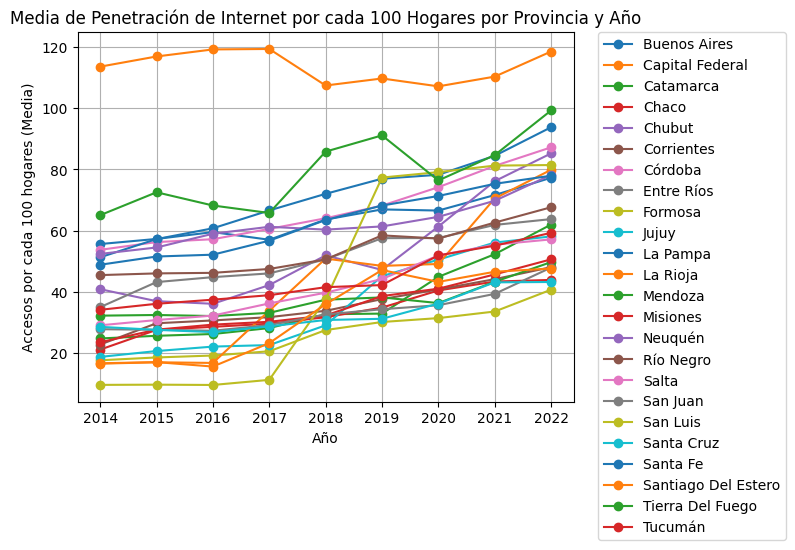

In [21]:
# gráfico de línea para ver cómo ha cambiado la penetración de Internet en el tiempo

# Calcular la media de penetración de internet por cada 100 hogares por provincia y año
df_internet_penetracion_media = df_internet_penetracion.groupby(['Provincia', 'Año'])['Accesos por cada 100 hogares'].mean().reset_index()
# Crear el gráfico de líneas
provincias = df_internet_penetracion_media['Provincia'].unique()
for provincia in provincias:
    datos_provincia = df_internet_penetracion_media[df_internet_penetracion_media['Provincia'] == provincia]
    plt.plot(datos_provincia['Año'], datos_provincia['Accesos por cada 100 hogares'], marker='o', label=provincia)

plt.xlabel('Año')
plt.ylabel('Accesos por cada 100 hogares (Media)')
plt.title('Media de Penetración de Internet por cada 100 Hogares por Provincia y Año')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(True)
plt.show()


El acceso a internet en Argentina ha aumentado significativamente en los últimos años.  En 2014, solo el 70% de los hogares argentinos tenían acceso a internet. Sin embargo, para 2022, esta cifra había aumentado al 98%. El mayor crecimiento del acceso a internet se ha producido en las provincias más rurales. Ademas el acceso a internet ha aumentado en todas las provincias en los últimos años, sin embargo todavía hay algunas provincias con un acceso a internet más bajo que otras.

Seguimos con el Dataframe "df_internet_tecnologia_localidad"

In [22]:
# veamos las primeras 5 filas del dataframe
df_internet_tecnologia_localidad.head(5)

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general,Unnamed: 13
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,873,4.704,- 0,2,- 0,975,- 0,664,7.218,NaN
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,- 0,- 0,- 0,10,1,- 0,- 0,192,NaN
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,- 0,- 0,- 0,- 0,- 0,- 0,- 0,181,181,NaN
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,- 0,782,- 0,6,167,- 0,- 0,327,1.282,NaN
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,- 0,- 0,- 0,- 0,- 0,- 0,- 0,6,6,NaN


In [23]:
# Obtenemos información de las columnas del DataFrame
df_internet_tecnologia_localidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Provincia      3142 non-null   object 
 1   Partido        3142 non-null   object 
 2   Localidad      3142 non-null   object 
 3   Link Indec     3142 non-null   object 
 4   ADSL           3142 non-null   object 
 5   CABLEMODEM     3142 non-null   object 
 6   DIAL UP        3142 non-null   object 
 7   FIBRA OPTICA   3142 non-null   object 
 8   OTROS          3142 non-null   object 
 9   SATELITAL      3142 non-null   object 
 10  WIMAX          3142 non-null   object 
 11  WIRELESS       3142 non-null   object 
 12  Total general  3142 non-null   object 
 13  Unnamed: 13    0 non-null      float64
dtypes: float64(1), object(13)
memory usage: 343.8+ KB


In [24]:
# observamos que la columna #13 no tiene nombre vamos a verificar su contendio y posiblemente eliminarla
columna_13 = df_internet_tecnologia_localidad['Unnamed: 13']
print("describimos la columna 12 \n", columna_13.describe())

describimos la columna 12 
 count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Unnamed: 13, dtype: float64


In [25]:
# borramos la columna Unnamed: 13'
df_internet_tecnologia_localidad.drop('Unnamed: 13', axis=1, inplace=True)
df_internet_tecnologia_localidad.head(5)

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,873,4.704,- 0,2,- 0,975,- 0,664,7.218
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,- 0,- 0,- 0,10,1,- 0,- 0,192
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,- 0,- 0,- 0,- 0,- 0,- 0,- 0,181,181
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,- 0,782,- 0,6,167,- 0,- 0,327,1.282
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,- 0,- 0,- 0,- 0,- 0,- 0,- 0,6,6


In [26]:
# Vamos a cambiar el tipo de datos del dataframe para trabajar mejor
rango_columnas = df_internet_tecnologia_localidad.columns[4:]

for col in rango_columnas:
    df_internet_tecnologia_localidad[col] = pd.to_numeric(df_internet_tecnologia_localidad[col], errors='coerce')
df_internet_tecnologia_localidad.head()

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,873.0,4.704,NaN,2.0,NaN,975.0,NaN,664.0,7.218
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181.0,NaN,NaN,NaN,10.0,1.0,NaN,NaN,192.000
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,181.0,181.000
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,NaN,782.000,NaN,6.0,167.0,NaN,NaN,327.0,1.282
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,6.000


In [27]:
# remplazamos los valores "NaN"  con "0"  para poder hacer un analisis claro y dashboard en PBI
df_internet_tecnologia_localidad.fillna(0, inplace=True)

df_internet_tecnologia_localidad.head(5)

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,873.0,4.704,0.0,2.0,0.0,975.0,0.0,664.0,7.218
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181.0,0.000,0.0,0.0,10.0,1.0,0.0,0.0,192.000
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0.0,0.000,0.0,0.0,0.0,0.0,0.0,181.0,181.000
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,0.0,782.000,0.0,6.0,167.0,0.0,0.0,327.0,1.282
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,0.0,0.000,0.0,0.0,0.0,0.0,0.0,6.0,6.000


In [28]:
# Verificamos que no tengamos  valores nulos en cada columna
df_internet_tecnologia_localidad.isnull().sum()

Provincia        0
Partido          0
Localidad        0
Link Indec       0
ADSL             0
CABLEMODEM       0
DIAL UP          0
FIBRA OPTICA     0
OTROS            0
SATELITAL        0
WIMAX            0
WIRELESS         0
Total general    0
dtype: int64

In [29]:
# Contamos el número de valores únicos en cada columna
df_internet_tecnologia_localidad.nunique()

Provincia          24
Partido           432
Localidad        2850
Link Indec       2718
ADSL              723
CABLEMODEM        691
DIAL UP            86
FIBRA OPTICA      705
OTROS             217
SATELITAL          24
WIMAX              12
WIRELESS          606
Total general    1345
dtype: int64

In [30]:
#Exportamos en nuevo df para visualizarlo en Powerbi
df_internet_tecnologia_localidad.to_csv("Internet_tecnologia_localidad_Pbi.csv", index=False)

In [31]:
columnas_apiladas = df_internet_tecnologia_localidad.columns[4:-1]
df_internet_tecnologia_localidad_apilado = df_internet_tecnologia_localidad.groupby(['Provincia'])[columnas_apiladas].sum()
df_internet_tecnologia_localidad_apilado['Total'] = df_internet_tecnologia_localidad_apilado[columnas_apiladas].sum(axis=1)
df_internet_tecnologia_localidad_apilado = df_internet_tecnologia_localidad_apilado.sort_values('Total', ascending=False)
df_internet_tecnologia_localidad_apilado


,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total
Provincia,,,,,,,,,
BUENOS AIRES,74723.190,38725.312,6199.000,55951.863,16421.861,1307.0,1672.0,68173.731,263173.957
CORDOBA,44709.180,18962.945,68.000,23465.420,4152.424,100.0,58.0,37897.196,129413.165
SANTA FE,39830.054,26814.840,110.000,22251.131,6654.658,137.0,0.0,28152.941,123950.624
ENTRE RIOS,10054.341,5087.992,22.000,5875.127,4029.299,27.0,224.0,16031.077,41350.836
MENDOZA,7417.272,518.418,777.000,10960.786,1939.000,50.0,0.0,15206.431,36868.907
SALTA,7845.193,4037.040,5.000,6643.654,4019.048,146.0,0.0,4374.713,27070.648
LA PAMPA,1813.988,3869.265,171.000,4940.629,1143.066,74.0,0.0,13387.835,25399.783
CHACO,6003.182,1677.183,5.000,5768.915,2277.000,77.0,0.0,8178.000,23986.280
MISIONES,5724.818,4887.099,0.000,1447.636,2778.797,51.0,0.0,6881.197,21770.547


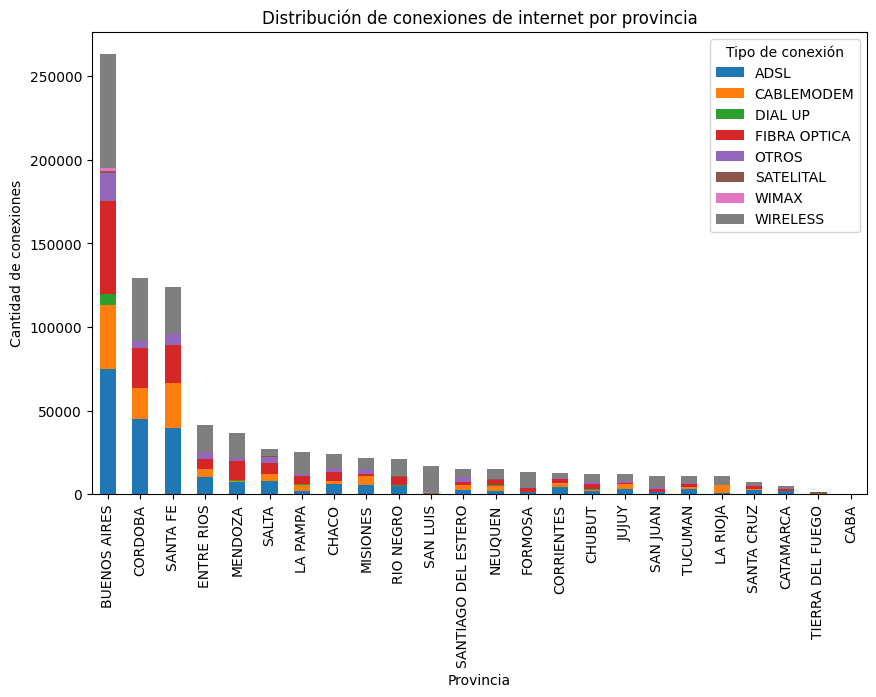

In [32]:
# Crear el gráfico de barras apiladas
df_internet_tecnologia_localidad_apilado_plot = df_internet_tecnologia_localidad_apilado[df_internet_tecnologia_localidad_apilado.columns[:-1]]
df_internet_tecnologia_localidad_apilado_plot.plot(kind='bar', stacked=True, figsize=(10, 6))

# Personalizar el gráfico
plt.title('Distribución de conexiones de internet por provincia')
plt.xlabel('Provincia')
plt.ylabel('Cantidad de conexiones')
plt.legend(title='Tipo de conexión')

# Mostrar el gráfico
plt.show()

In [33]:
Podemos observar que la provincia con la mayor cantidad de conexiones de internet es la provincia de Buenos Aires, con 263.173 de conexiones 
y la provincia de Córdoba, con 129.413 conexiones. Las provincias con la menor cantidad de conexiones de internet son Caba, con 364 conexiones, y Tierra del fuego, 
con 120.000 conexiones. Tambien podemos ver que las conexiones de internet es desigual entre las provincias. La Provincia de Buenos Aires 
tiene más del doble de conexiones de internet que la provincia de Cordoba, que es la segunda provincia con más conexiones. 
Las provincias más rurales tienen mucho menos acceso a internet que las provincias más urbanas. Este gráfico muestra la importancia de tener acceso a internet en Argentina.
El internet es una herramienta esencial para la educación, el trabajo, el comercio y el entretenimiento. Las provincias con menos acceso a internet están en desventaja 
frente a las provincias con más acceso. El gobierno de Argentina debe tomar medidas para aumentar el acceso a internet en las provincias más rurales.

SyntaxError: invalid syntax (3115905152.py, line 1)

Seguimos con el Dataframe "df_internet_velocidad_bajada"


In [ ]:
# veamos las primeras filas 
df_internet_velocidad_bajada.head()

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 mbps","0,375 mbps","0,5 mbps","0,512 mbps","0,625 mbps",...,75 mbps,78 mbps,80 mbps,82 mbps,83 mbps,85 mbps,90 mbps,92 mbps,95 mbps,100 mbps
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,NaN,NaN,NaN,2,NaN,NaN,...,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Obtenemos información sobre las columnas del dataframe
df_internet_velocidad_bajada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3098 entries, 0 to 3097
Data columns (total 83 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Provincia   3098 non-null   object 
 1   Partido     3098 non-null   object 
 2   Localidad   3098 non-null   object 
 3   Link Indec  3098 non-null   object 
 4   Otros       956 non-null    object 
 5   0,256 mbps  29 non-null     float64
 6   0,375 mbps  1 non-null      float64
 7   0,5 mbps    643 non-null    object 
 8   0,512 mbps  524 non-null    float64
 9   0,625 mbps  1 non-null      float64
 10  0,75 mbps   284 non-null    object 
 11  1 mbps      931 non-null    object 
 12  1,25 mbps   1 non-null      float64
 13  1,5 mbps    16 non-null     object 
 14  2 mbps      741 non-null    object 
 15  2,2 mbps    1 non-null      float64
 16  2,5 mbps    3 non-null      float64
 17  3 mbps      1388 non-null   object 
 18  3,3 mbps    1 non-null      float64
 19  3,5 mbps    373 non-null   

In [ ]:
# Contar el número de valores nulos en cada columna
df_internet_velocidad_bajada.isnull().sum()

Provincia        0
Partido          0
Localidad        0
Link Indec       0
Otros         2142
              ... 
85 mbps       3097
90 mbps       3096
92 mbps       3096
95 mbps       3097
100 mbps      2545
Length: 83, dtype: int64

## Comenzamos con la creacion y analisis de graficos

In [ ]:
# Verificar si hay celdas no numéricas en la columna '100 mbps'
non_numeric_values = df_internet_velocidad_bajada[~df_internet_velocidad_bajada['100 mbps'].apply(lambda x: isinstance(x, (int, float)))]
non_numeric_values

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 mbps","0,375 mbps","0,5 mbps","0,512 mbps","0,625 mbps",...,75 mbps,78 mbps,80 mbps,82 mbps,83 mbps,85 mbps,90 mbps,92 mbps,95 mbps,100 mbps
11,BUENOS AIRES,9 de Julio,9 de Julio,6588100,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1,343"
17,BUENOS AIRES,Adolfo Alsina,Carhué,6007010,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
26,BUENOS AIRES,Alberti,Alberti (Est. Andrés Vaccarezza),6021010,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
28,BUENOS AIRES,Almirante Brown,Adrogué,6028010,NaN,1.0,NaN,10,1.0,NaN,...,235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"3,360"
29,BUENOS AIRES,Almirante Brown,Burzaco,6028010,50,1.0,NaN,9,1.0,NaN,...,885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"5,258"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066,TUCUMAN,Lules,Lules,90063050,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70
3091,TUCUMAN,Tafí Viejo,Diagonal Norte - Luz y Fuerza - Los Pocitos - ...,90105060,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,219
3092,TUCUMAN,Tafí Viejo,Tafí Viejo,90105080,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"3,163"
3093,TUCUMAN,Tafí Viejo,Villa Mariano Moreno - El Colmenar,90105100,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,304


In [ ]:
# Eliminar filas que contengan celdas no numéricas en la columna '100 mbps'
df_internet_velocidad_bajada = df_internet_velocidad_bajada[df_internet_velocidad_bajada['100 mbps'].apply(lambda x: isinstance(x, (int, float)))]
df_internet_velocidad_bajada

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 mbps","0,375 mbps","0,5 mbps","0,512 mbps","0,625 mbps",...,75 mbps,78 mbps,80 mbps,82 mbps,83 mbps,85 mbps,90 mbps,92 mbps,95 mbps,100 mbps
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,NaN,NaN,NaN,2,NaN,NaN,...,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3089,TUCUMAN,Tafí Viejo,Barrio Lomas de Tafí,90105020,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3090,TUCUMAN,Tafí Viejo,Barrio Mutual San Martín,90105030,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3094,TUCUMAN,Trancas,San Pedro de Colalao,90112020,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3095,TUCUMAN,Trancas,Villa de Trancas,90112030,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# remplazamos los valores "NaN"  con "0"  para poder hacer un analisis claro y dashboard en PBI
df_internet_velocidad_bajada.fillna(0, inplace=True)

df_internet_velocidad_bajada.head(5)

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 mbps","0,375 mbps","0,5 mbps","0,512 mbps","0,625 mbps",...,75 mbps,78 mbps,80 mbps,82 mbps,83 mbps,85 mbps,90 mbps,92 mbps,95 mbps,100 mbps
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0,0.0,0.0,2,0.0,0.0,...,0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,0,0.0,0.0,0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,0,0.0,0.0,1,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,0,0.0,0.0,0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0,0.0,0.0,0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
#Exportamos en nuevo df para visualizarlo en Powerbi
df_internet_velocidad_bajada.to_csv("Internet_velocidad_bajada_pbi.csv", index=False)

Gráfico de barras agrupado por provincia y visualizando la velocidad de 100 mbps

In [ ]:
# Seleccionar las columnas de velocidad de internet para convertir todos los datos a numero
columnas_mbps = df_internet_velocidad_bajada.columns[5:]
for col in columnas_mbps:
    df_internet_velocidad_bajada[col] = pd.to_numeric(df_internet_velocidad_bajada[col], errors='coerce')
df_internet_velocidad_bajada[columnas_mbps]


,"0,256 mbps","0,375 mbps","0,5 mbps","0,512 mbps","0,625 mbps","0,75 mbps",1 mbps,"1,25 mbps","1,5 mbps",2 mbps,...,75 mbps,78 mbps,80 mbps,82 mbps,83 mbps,85 mbps,90 mbps,92 mbps,95 mbps,100 mbps
0,0.0,0.0,2.0,0.0,0.0,19,0.0,0.0,0,0.0,...,0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,1.0,0.0,0.0,0,0.0,0.0,0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,106.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3089,0.0,0.0,0.0,0.0,0.0,0,2.0,0.0,0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3090,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3094,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3095,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,0,1.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


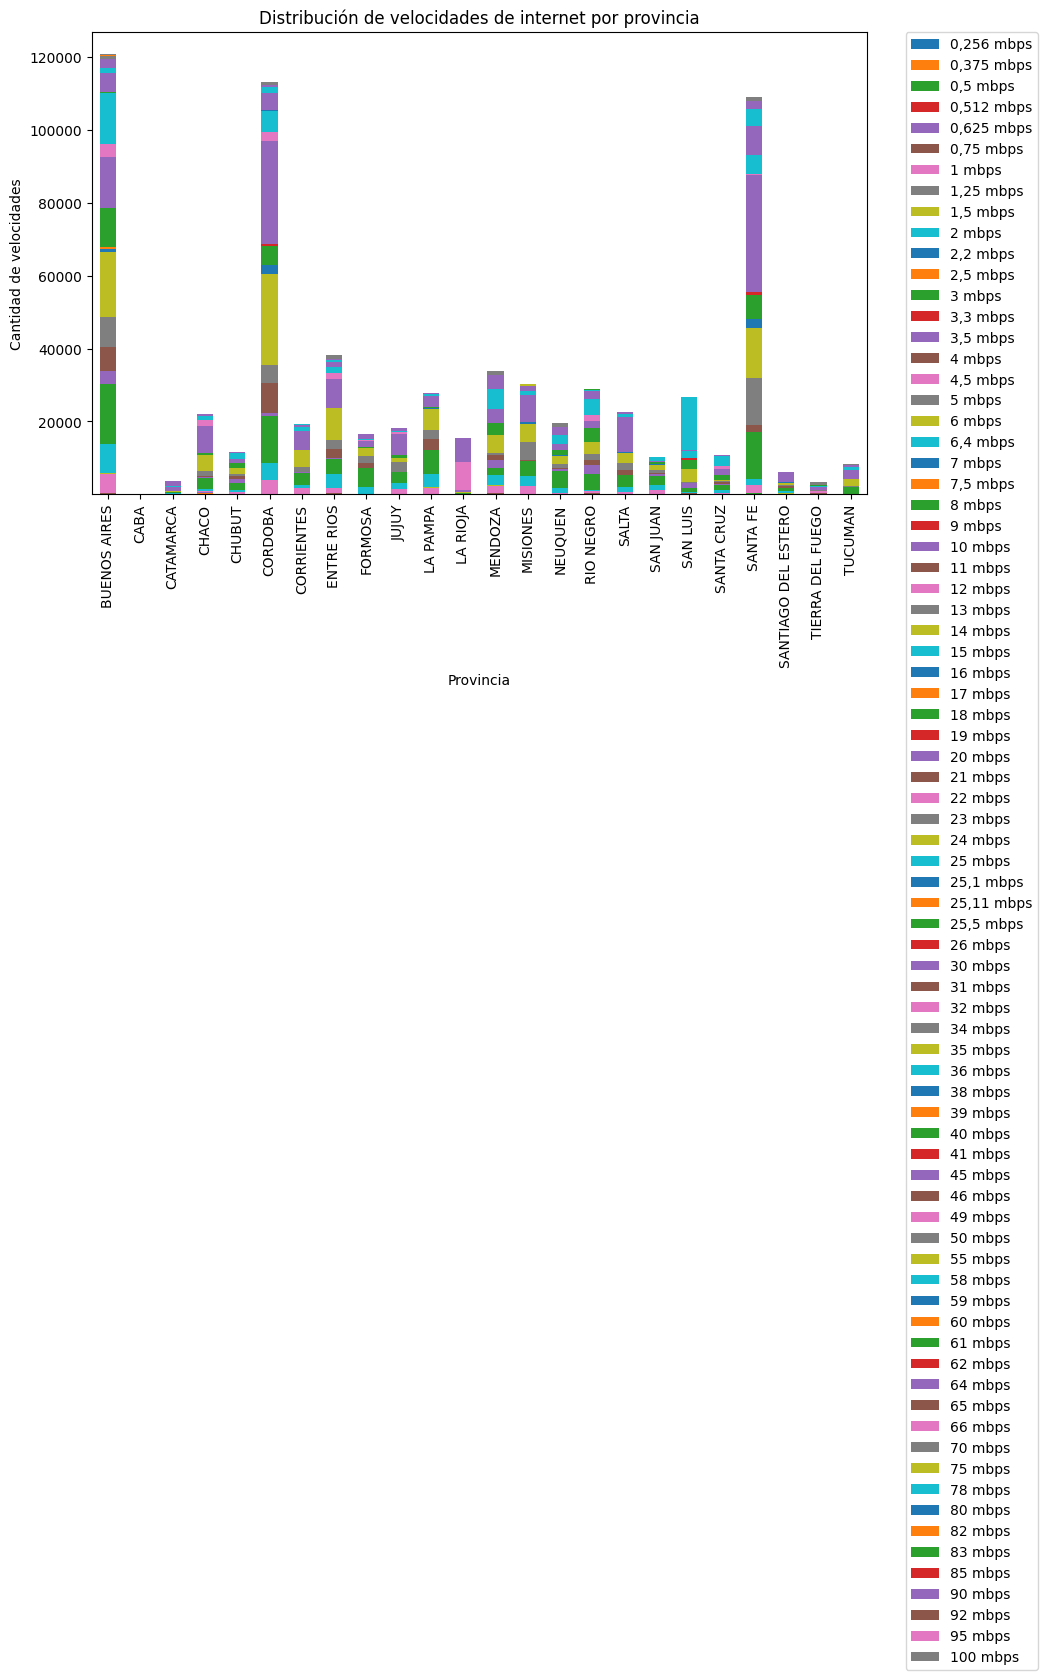

In [ ]:
filtro_columnas = ["Provincia"] + list(columnas_mbps)
df_provincias = df_internet_velocidad_bajada[filtro_columnas].groupby("Provincia").sum()

df_provincias.plot(kind='bar', stacked=True, figsize=(10, 6))

# Personalizar el gráfico
plt.title('Distribución de velocidades de internet por provincia')
plt.xlabel('Provincia')
plt.ylabel('Cantidad de velocidades')
plt.legend(title='Velocidad')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# Mostrar el gráfico
plt.show()

In [ ]:
En este análisis visual en forma de gráfico de barras apiladas se presenta la distribución de las velocidades de internet en cada provincia. 
Cada barra representa la velocidad promedio de internet para cada provincia, y los segmentos dentro de cada barra representan la distribución de velocidades en diferentes rangos.
Según los datos del gráfico, se puede concluir que la velocidad de descarga de internet en Argentina varía de manera desigual entre las provincias. Existe una amplia gama de velocidades,
 que van desde valores mínimos de 0.256 mbps hasta valores máximos de 100 mbps. Algunas provincias, como Chaco, Buenos Aires, Misiones y Neuquén,
muestran una mayor dispersión en las velocidades de internet, mientras que CABA, San Juan y San Luis presentan una distribución más uniforme.
Es importante tener en cuenta que estos datos corresponden a una muestra y no representan necesariamente la totalidad de la población de Argentina.
Por lo tanto, se recomienda continuar explorando los datos y realizar análisis estadísticos más detallados para obtener una comprensión más precisa
 de la distribución de las velocidades de descarga de internet en Argentina.

Seguimos con el Dataframe "df_historico_velocidad_internet"

In [ ]:
# veamos las primeras filas de DF
df_historico_velocidad_internet.head()

,Año,Trimestre,Provincia,Mbps (Media de bajada),Unnamed: 4,Unnamed: 5
0,2022,3,Buenos Aires,70,NaN,NaN
1,2022,3,Capital Federal,101,NaN,NaN
2,2022,3,Catamarca,61,NaN,NaN
3,2022,3,Chaco,53,NaN,NaN
4,2022,3,Chubut,16,NaN,NaN


In [ ]:
# Eliminamos las columnas que no nos sirven
df_historico_velocidad_internet = df_historico_velocidad_internet.drop(['Unnamed: 4', 'Unnamed: 5'], axis=1)
df_historico_velocidad_internet.head()

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2022,3,Buenos Aires,70
1,2022,3,Capital Federal,101
2,2022,3,Catamarca,61
3,2022,3,Chaco,53
4,2022,3,Chubut,16


In [ ]:
# Obtener información sobre el DataFrame
df_historico_velocidad_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Año                     840 non-null    int64 
 1   Trimestre               840 non-null    int64 
 2   Provincia               840 non-null    object
 3   Mbps (Media de bajada)  840 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 26.4+ KB


In [ ]:
# Contar el número de valores nulos en cada columna
df_historico_velocidad_internet.isnull().sum()

Año                       0
Trimestre                 0
Provincia                 0
Mbps (Media de bajada)    0
dtype: int64

In [ ]:
#Creamos una nueva columna concatenando las columnas "Año" y "Trimestre" 
df_historico_velocidad_internet['año_trimestre'] = df_historico_velocidad_internet['Año'].astype(str) + '-T' + df_historico_velocidad_internet['Trimestre'].astype(str)


In [ ]:
#Exportamos en nuevo df para visualizarlo en Powerbi
df_historico_velocidad_internet.to_csv("historico_velocidad_internet_Pbi.csv", index=False)

/Users/jcaviedesc/.pyenv/versions/3.10.2/envs/henry-maria/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


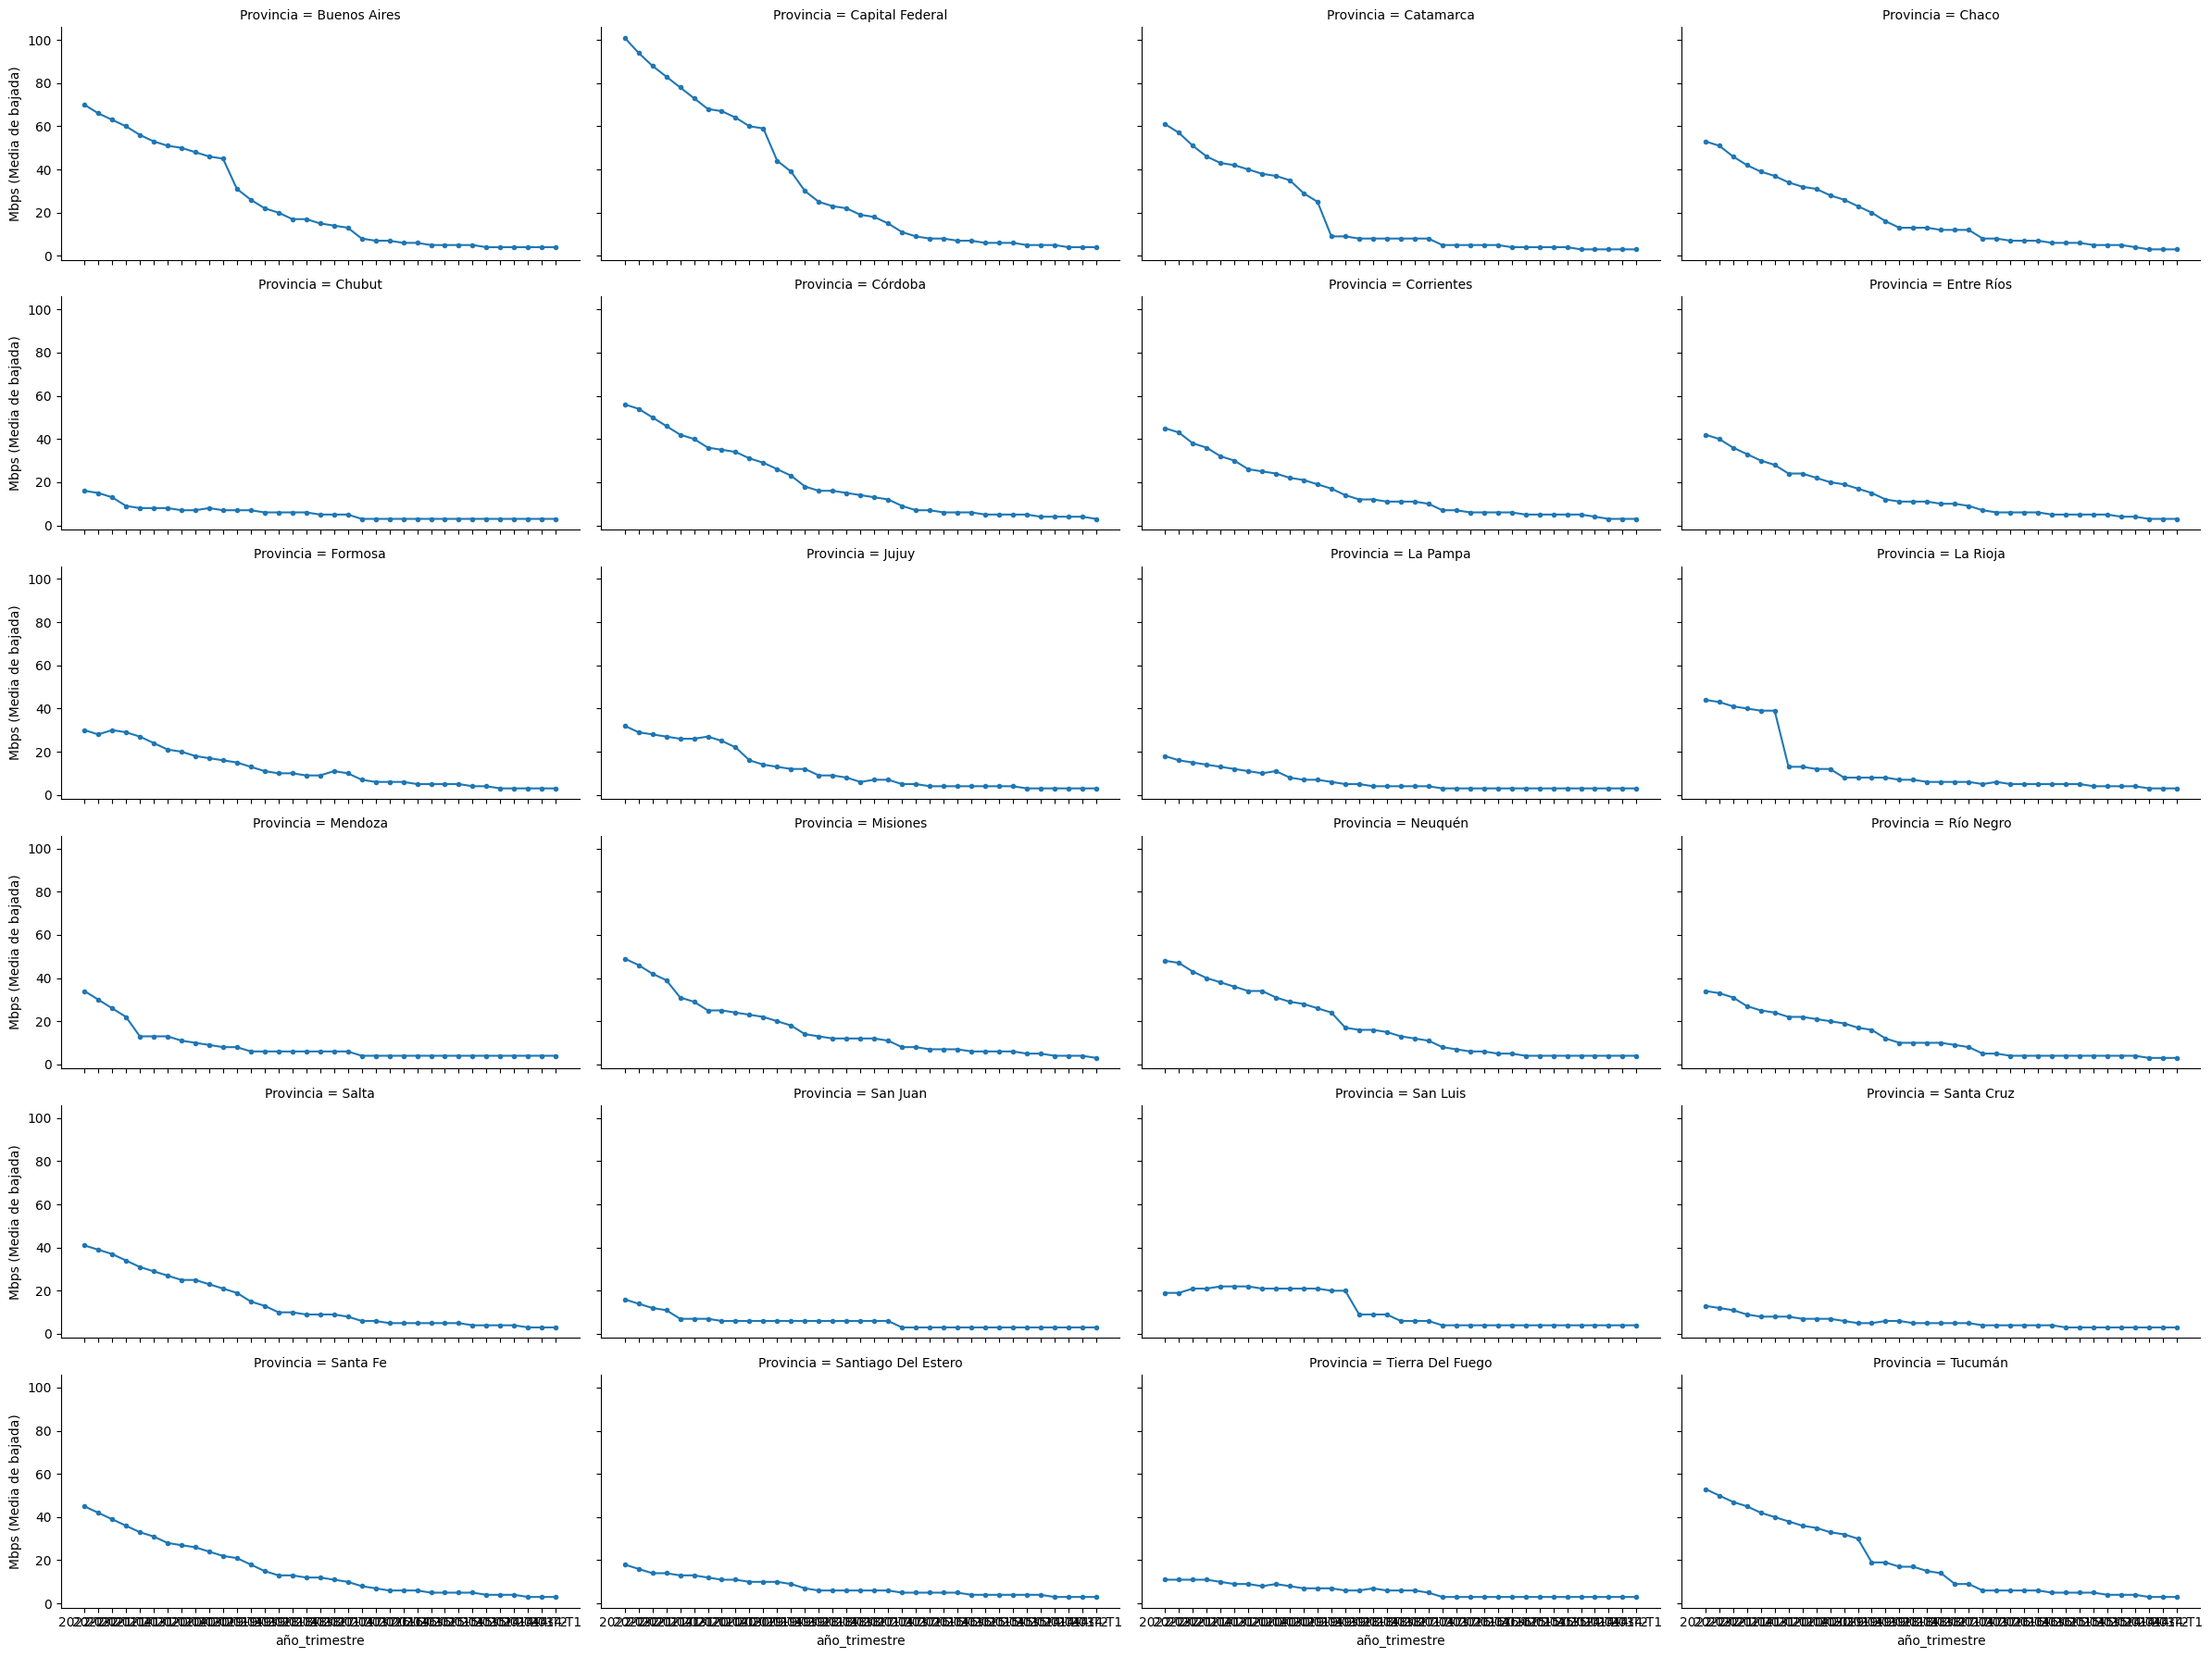

In [ ]:
# Gráfico de líneas por provincia
g = sns.FacetGrid(df_historico_velocidad_internet, col='Provincia', col_wrap=4, height=3, aspect=2)
g.map(plt.plot, 'año_trimestre', 'Mbps (Media de bajada)', marker='.')

Podemos observar cómo la velocidad media de bajada varía a lo largo de los años y trimestres. 
También podemos observar si hay alguna tendencia en la velocidad de bajada en cada provincia.